### Bộ dữ liệu House Price – Đống Đa chứa thông tin mua bán nhà quận Đống đa, các thông tin được thống kê bao gồm:<br>

Title: Tiêu đề  <br>
Address: địa chỉ<br>
Area: khu vực<br>
Price: giá<br>
postDate: ngày đăng<br>
land_certificate: giấy chứng nhận<br>
house_direction: hướng nhà<br>
balcony_direction: hướng ban công<br>
toilet: số phòng vệ sinh<br>
bedroom: số phòng ngủ<br>
floor: số tầng<br>
type_of_land: loại nhà đất<br>
street_name: tên đường<br>
ward_name: tên phường<br>
district_name: tên quận<br>
city_name: tên thành phố<br>
lat: vĩ độ<br>
long: kinh độ<br>
1. Đọc bộ dữ liệu, cho biết số dòng, số cột và kiểu dữ liệu của các thuộc tính.<br>
2. Lọc ra các bản ghi bán nhà riêng tại phường Trung liệt hoặc phường Khâm Thiên<br>
3. Lọc các thông tin Địa chỉ, Giá, Hướng nhà, Hướng ban công của các bản ghi có giấy chứng nhận sổ đỏ và có 3 phòng ngủ trở lên.<br>
4. Với mỗi loại nhà đất, tính trung bình cộng giá cũng như giá lớn nhất và giá nhỏ nhất.<br>
5. Tính trung bình cộng số phòng ngủ, số phòng vệ sinh, số tầng của mỗi phường.<br>
6. Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu
7. Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá
8. Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”, house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó,
9. Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ
10. Tính toán giá/m2  ( đơn vị triệu/m2) với loại hình nhà ngõ
11. Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR
12. Thực hiện loại bỏ các dòng dữ liệu ngoại lai
13. Chuẩn hóa dữ liệu của tất cả các thuộc tính: price/m2 bằng các phương pháp: min-max scaling, z- score scaling, Robust scaling, và so sánh phân bố của thuộc tính này trước và sau khi chuẩn hóa
14. Vẽ biểu đồ phân tích mối liên hệ giữa diện tích với giá nhà, giữa số phòng ngủ với giá nhà, giữa số toilet với giá nhà.
15. Vẽ biểu đồ so sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land).
16. Vẽ biểu đồ thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).
17. Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ.
18. Phân tích mối liên hệ giữa diện tích với giá nhà. Đồng thời, giữa số phòng ngủ với giá nhà và giữa số toilet với giá nhà.
19. Vẽ biểu đồ phân bố thể hiện phân bố của giá nhà theo các hướng, nhận xét.
20. Vẽ biểu đồ tần số để đếm số nhà ở mỗi hướng nhà, nhận xét.
21.Vẽ biểu đồ so sánh phân phối giá (triệu đ/m2) giữa nhà Phố và Nhà ngõ
22.Kiểm định giả thuyết giá (triệu đ/m2) nhà mặt phố cao hơn giá nhà trong ngõ với mức ý nghĩa 5%
23.Giá của những căn nhà không có thông tin về giấy tờ pháp lý thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý với mức ý nghĩa 5%
24. Giữa giá nhà và diện tích có tương quan với nhau?
25. Giữa giá nhà và tọa độ địa lý (lat, long) có tương quan với nhau
26. Giữa thuộc tính land_certificate và property_type có tương quan với nhau
27. Hãy  mã hóa lại thuộc tính giá nhà theo đơn vị (nghìn đồng/m2) và sắp xếp giá nhà thành 4 mức tương ứng với các khoảng tứ phân vị. Tiến hành kiểm định tương quan giữa biến giá nhà này với các biến tọa độ vị trí (lat, long)

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
data = pd.read_csv('house_price.csv')
data

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,NaN,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho


1. Đọc bộ dữ liệu, cho biết số dòng, số cột và kiểu dữ liệu của các thuộc tính.

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [68]:
data.shape

(671, 12)

2. Lọc ra các bản ghi bán nhà riêng tại phường Trung liệt hoặc phường Khâm Thiên


3. Lọc các thông tin Địa chỉ, Giá, Hướng nhà, Hướng ban công của các bản ghi có giấy chứng nhận sổ đỏ và có 3 phòng ngủ trở lên.

In [69]:
df = data[(data['land_certificate']=='So do') & (data['bedroom']>=3)]

df[['area','price','house_direction','balcony_direction']]

,area,price,house_direction,balcony_direction
0,50.0,14700.0,NaN,NaN
1,57.0,4200.0,Nam,Nam
2,62.0,11000.0,NaN,dong-Nam
3,26.0,2900.0,NaN,NaN
6,39.0,5280.0,Tay-Nam,NaN
...,...,...,...,...
650,100.0,22500.0,NaN,NaN
653,45.0,30000.0,dong-Bac,NaN
659,45.0,12000.0,dong-Nam,NaN
663,143.0,72000.0,NaN,NaN


4. Tính trung bình cộng số phòng ngủ, số phòng vệ sinh, số tầng của mỗi phường.

In [70]:
data.pivot_table(values=['toilet','bedroom','floor'], index='area', aggfunc={'toilet':np.mean,'bedroom':np.mean, 'floor':np.mean})
                         

,bedroom,floor,toilet
area,,,
20.0,3.000000,4.000000,2.5
22.0,1.000000,NaN,1.0
23.0,3.000000,4.000000,3.0
25.0,2.625000,4.500000,3.0
26.0,3.000000,4.000000,4.0
...,...,...,...
368.0,NaN,1.000000,NaN
416.0,NaN,5.400000,NaN
420.0,NaN,9.000000,NaN


#### 6. Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu

In [71]:
df = data.isna().sum().sort_values(ascending=False)
df

balcony_direction    647
house_direction      629
toilet               431
bedroom              351
floor                305
land_certificate     302
price                 54
area                   6
postDate               0
lat                    0
long                   0
property_type          0
dtype: int64

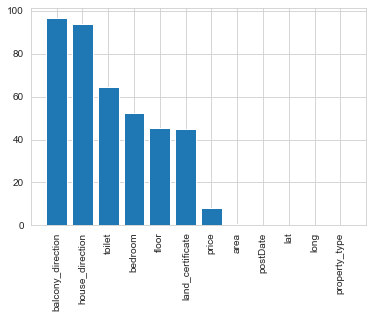

In [72]:
x=df.index
y=100*df.values/data.shape[0]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

#### 7. Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá

In [73]:
price_null_index = data[data['price'].isnull()].index
data.drop(price_null_index, inplace = True)
data

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,NaN,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho


#### 8. Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”, house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó,

In [74]:
mode = data[['house_direction','balcony_direction','toilet','bedroom','floor']].mode()
dict_data = {i: mode.loc[0,i] for i in mode.columns}
data.fillna({'land_certificate': 'không có thông tin'}, inplace=True)
data.fillna(dict_data, inplace=True) #dùng pp thay thế trên các cột cụ thể 

In [75]:
data

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,dong-Nam,dong-Nam,4.0,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.016106,105.832157,mat pho


#### 9. Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ

In [76]:
data['property_type'].value_counts() 
# => kiểm tra Dữ liệu có 2 loại nhà, format ko cần thay đổi

trong ngo    407
mat pho      210
Name: property_type, dtype: int64

In [77]:
data_nhango = data[data['property_type']=='trong ngo'].copy()
data_nhango

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,không có thông tin,dong-Bac,Tay-Bac,4.0,3.0,8.0,21.017799,105.810572,trong ngo
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo


#### 10. Tính toán giá/m2  ( đơn vị triệu/m2) với loại hình nhà ngõ

In [78]:
data_nhango['Giá/m2'] = round(10**3*data_nhango['price']/data_nhango['area'])
data_nhango

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,Giá/m2
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294000.0
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73684.0
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177419.0
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111538.0
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,không có thông tin,dong-Bac,Tay-Bac,4.0,3.0,8.0,21.017799,105.810572,trong ngo,355556.0
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,272414.0
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,106250.0
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,102632.0


#### 11. Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR

<AxesSubplot:xlabel='Giá/m2'>

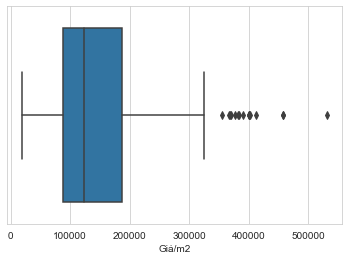

In [79]:
sns.boxplot(x=data_nhango['Giá/m2'])

In [80]:
df = data_nhango[['area','Giá/m2']]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

area         27.75
Giá/m2    99080.75
dtype: float64

#### 12. Thực hiện loại bỏ các dòng dữ liệu ngoại lai

In [81]:
data_not_outliers= data_nhango[~((df<(Q1-1.5*IQR)) | (df> (Q3 + 1.5*IQR))).any(axis=1)]
data_not_outliers

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,Giá/m2
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294000.0
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73684.0
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177419.0
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111538.0
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,25.0,2850.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,2.0,4.0,21.029522,105.827353,trong ngo,114000.0
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,272414.0
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,106250.0
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,102632.0


#### 13. Chuẩn hóa dữ liệu của tất cả các thuộc tính: price/m2 bằng các phương pháp: min-max scaling, z- score scaling, Robust scaling, và so sánh phân bố của thuộc tính này trước và sau khi chuẩn hóa

<AxesSubplot:xlabel='Giá/m2'>

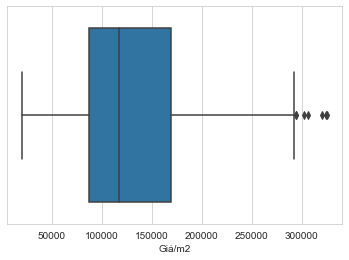

In [82]:
sns.boxplot(x=data_not_outliers['Giá/m2'])

<AxesSubplot:xlabel='Giá/m2', ylabel='Density'>

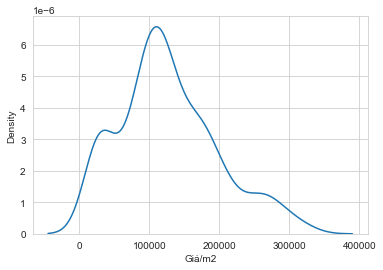

In [83]:
sns.kdeplot(data=data_not_outliers['Giá/m2'])

In [84]:
s_scaler = MinMaxScaler()
df_s = np.array(data_not_outliers['Giá/m2']).reshape(-1,1)
data_not_outliers['Giá/m2'] = s_scaler.fit_transform(df_s)
data_not_outliers

C:\Users\HP\AppData\Local\Temp\ipykernel_15740\3244230662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_not_outliers['Giá/m2'] = s_scaler.fit_transform(df_s)


,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,Giá/m2
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,0.898209
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,0.174782
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,0.515405
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,0.299079
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,0.257088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,25.0,2850.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,2.0,4.0,21.029522,105.827353,trong ngo,0.307163
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,0.827329
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,0.281715
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,0.269835


<AxesSubplot:xlabel='Giá/m2', ylabel='Density'>

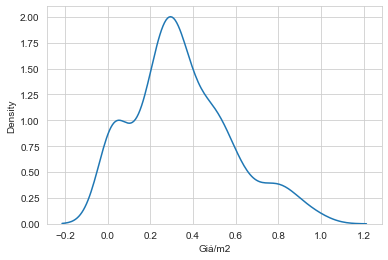

In [85]:
sns.kdeplot(data=data_not_outliers['Giá/m2'])

<AxesSubplot:xlabel='Giá/m2'>

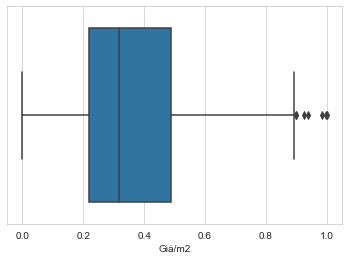

In [86]:
sns.boxplot(x=data_not_outliers['Giá/m2'])

Hầu như không có sự thay đổi về hình dáng biểu đồ, sau khi chuẩn hóa dữ liệu thu lại về khoảng giá trị nhỏ hơn giá trị ban đầu

#### 14. Vẽ iểu đồ phân tích mối liên hệ giữa diện tích với giá nhà, giữa số phòng ngủ với giá nhà, giữa số toilet với giá nhà.

In [87]:
data
#data đã xử lý dữ liệu khuyết thiếu, xóa dữ liệu price ko có giá trị, thay thế các dữ liệu khuyết thiếu

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,dong-Nam,dong-Nam,4.0,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.016106,105.832157,mat pho


<AxesSubplot:>

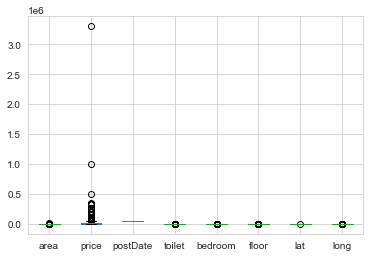

In [88]:
#check dữ liệu ngoại lai
data.boxplot()

<AxesSubplot:>

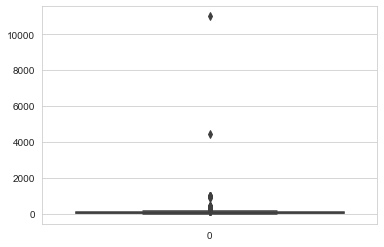

In [89]:
sns.boxplot(data = data['area'])

In [90]:
data.isnull().sum()
#=> còn dữ liệu area chưa có thông tin 2 cột, tiến hành xóa dữ liệu này để không ảnh hưởng đến tính giá
data.dropna(inplace=True)
data = data[data['area']>0]

In [91]:
#xử lý dữ liệu ngoại lai với 2 cột area và price
df = data[['area','price']]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# data['Outliner']= ~((df<(Q1-1.5*IQR)) | (df> (Q3 + 1.5*IQR)))
# data = data[data['Outliner']==True]
# data
data= data[~((df<(Q1-1.5*IQR)) | (df> (Q3 + 1.5*IQR))).any(axis=1)]
data

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
664,76.0,30500.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009533,105.820193,mat pho
667,65.0,17500.0,44325,So do,dong-Nam,dong-Nam,4.0,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.016106,105.832157,mat pho


<AxesSubplot:>

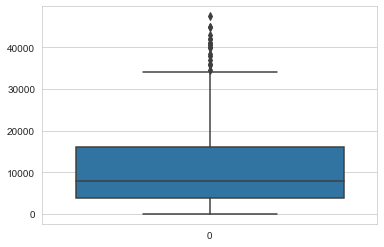

In [92]:
sns.boxplot(data = data['price'])

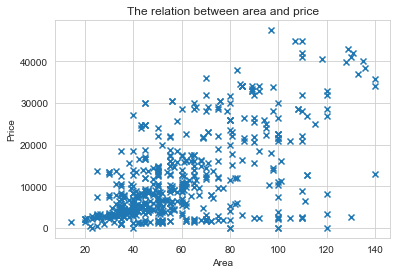

In [93]:
plt.scatter(x=data['area'].values, y=data['price'].values, marker='x')
plt.title('The relation between area and price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

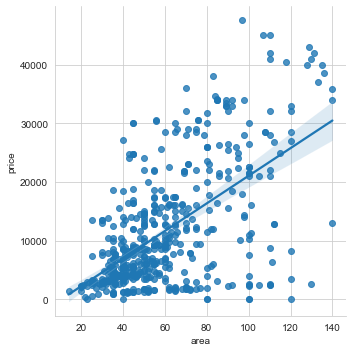

In [94]:
sns.set_style('whitegrid')
sns.lmplot(x='area', y='price', data=data)

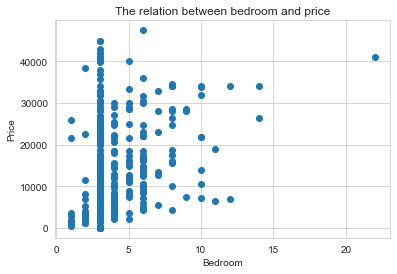

In [95]:
plt.scatter(x=data['bedroom'].values, y=data['price'].values, marker='o')
plt.title('The relation between bedroom and price')
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.show()

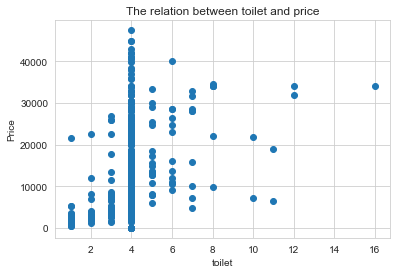

In [96]:
plt.scatter(x=data['toilet'].values, y=data['price'].values, marker='o')
plt.title('The relation between toilet and price')
plt.xlabel('toilet')
plt.ylabel('Price')
plt.show()

#### 15. Vẽ biểu đồ so sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land).<br>

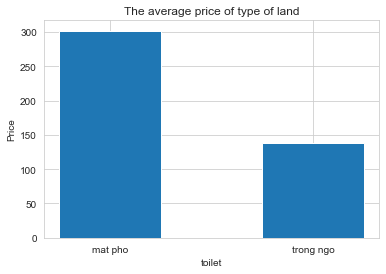

In [97]:
data['Gia/1m2'] = data['price']/data['area']
data1 = data.groupby('property_type')['Gia/1m2'].mean()
# data[data['property_type']=='trong ngo'].min()
data1
# data.isnull().sum()
plt.bar(x = data1.index, height = data1.values, width=0.5)
plt.title('The average price of type of land')
plt.xlabel('toilet')
plt.ylabel('Price')
plt.show()

#### 16. Vẽ biểu đồ thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).

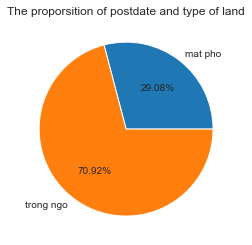

In [98]:
data2 = data.groupby('property_type')['postDate'].sum()
plt.pie(data2, labels = data2.index, autopct='%1.2f%%')
plt.title('The proporsition of postdate and type of land')
plt.show()

#### 17. Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ.

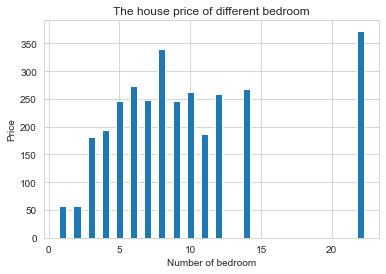

In [99]:
data3 = data.groupby('bedroom')['Gia/1m2'].mean()
plt.bar(x = data3.index, height = data3.values, width=0.5)
plt.title('The house price of different bedroom')
plt.xlabel('Number of bedroom')
plt.ylabel('Price')
plt.show()

#### 18. Phân tích mối liên hệ giữa diện tích với giá nhà. Đồng thời, giữa số phòng ngủ với giá nhà và giữa số toilet với giá nhà.

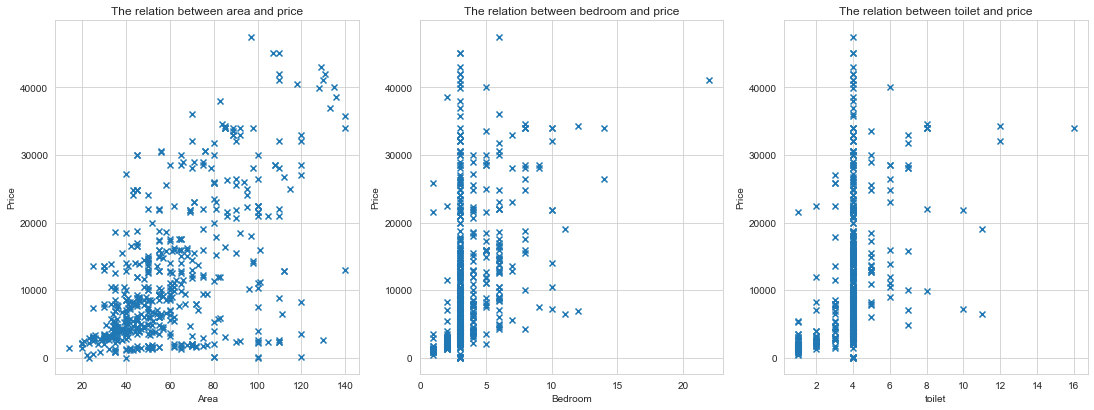

In [100]:
fig, ax =plt.subplots(1,3)
ax[0].scatter(x=data['area'].values, y=data['price'].values, marker='x')
ax[0].set_title('The relation between area and price')
ax[0].set_xlabel('Area')
ax[0].set_ylabel('Price')

ax[1].scatter(x=data['bedroom'].values, y=data['price'].values, marker='x')
ax[1].set_title('The relation between bedroom and price')
ax[1].set_xlabel('Bedroom')
ax[1].set_ylabel('Price')

ax[2].scatter(x=data['toilet'].values, y=data['price'].values, marker='x')
ax[2].set_title('The relation between toilet and price')
ax[2].set_xlabel('toilet')
ax[2].set_ylabel('Price')

fig.set_size_inches(18.5, 6.5)
plt.show()

#### 19.  Vẽ biểu đồ phân bố thể hiện phân bố của giá nhà theo các hướng, nhận xét.

<AxesSubplot:xlabel='house_direction', ylabel='price'>

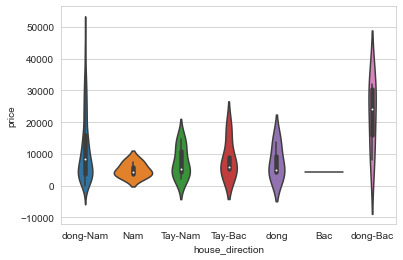

In [101]:
sns.violinplot(x='house_direction', y='price', data=data)

<AxesSubplot:xlabel='house_direction', ylabel='price'>

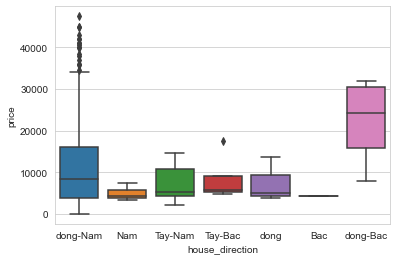

In [102]:
sns.boxplot(x='house_direction', y='price', data=data)

Hướng Đông Bắc có giá nhà cao hơn so với các hướng khác<br>
75% nhà hướng đông bắc có giá cao hơn so với nhà có hướng Nam, tay Nam, tây bắc<br>
Dữ liệu hướng nhà đã được xử lý số liệu nên độ chính xác không còn cao, cụ thể hướng nhà đông nam vì dữ liệu ngoaij lai nhiều đã dẫn đên <br>
phân bố của trung vị (chấm màu trắng) tăng giá trị, làm cho phân phối không chuẩn và bị lệcha<br>

#### 20. Vẽ biểu đồ tần số để đếm số nhà ở mỗi hướng nhà, nhận xét.

<AxesSubplot:xlabel='house_direction', ylabel='count'>

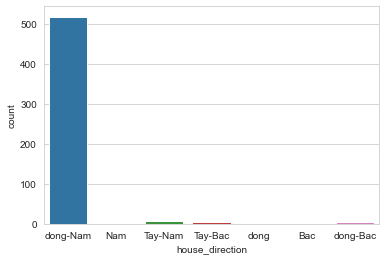

In [103]:
sns.countplot(x='house_direction', data=data)

#### 21.Vẽ biểu đồ so sánh phân phối giá (triệu đ/m2) giữa nhà Phố và Nhà ngõ


<AxesSubplot:xlabel='property_type', ylabel='price'>

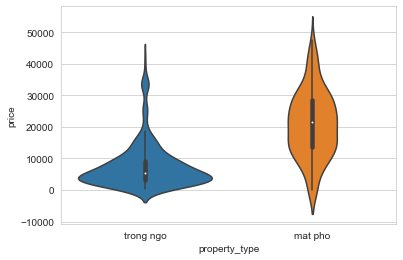

In [104]:
sns.violinplot(x='property_type', y='price', data=data)

Nhận xét: Nhà trong ngõ có giá thấp hơn nhiều so với nhà mặt phố 

#### 22.Kiểm định giả thuyết giá (triệu đ/m2) nhà mặt phố cao hơn giá nhà trong ngõ với mức ý nghĩa 5%

H0: Giá nhà mặt phố bằng giá nhà trong hẻm <br>
H1: Giá nhà mặt phố cao hơn giá nhà trong hẻm 

In [105]:
dt_matpho = data[data['property_type']=='mat pho']['price']
dt_trongngo = data[data['property_type']=='trong ngo']['price']
var_dt_matpho = np.var(dt_matpho)
var_dt_trongngo = np.var(dt_trongngo)

In [106]:
ratio = f'{round(var_dt_matpho/var_dt_trongngo)}:1' if var_dt_matpho>var_dt_trongngo else\
f'{round(var_dt_trongngo/var_dt_matpho)}:1'
ratio

'2:1'

In [107]:
stats.ttest_ind(a=dt_matpho, b=dt_trongngo, equal_var=True)

Ttest_indResult(statistic=16.99833298405994, pvalue=3.488593869498034e-52)

pvalue <0.05 => Đủ đk bác bỏ H0 vậy có thể kết luận nhà mặt phố giá cao hơn nhà trong hẻm

#### 23.Giá của những căn nhà không có thông tin về giấy tờ pháp lý thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý với mức ý nghĩa 5%

H0: Giá của những căn nhà không có thông tin về giấy tờ pháp lý bằng giá những căn có thông tin về giấy tờ pháp lý<br>
H1: Giá của những căn nhà không có thông tin về giấy tờ pháp lý nhỏ hơn giá những căn có thông tin về giấy tờ pháp lý<br>

In [108]:
dt_pl = data[data['land_certificate']=='So do']['price']
dt_kpl = data[data['land_certificate']!='So do']['price']
var_dt_pl= np.var(dt_pl)
var_dt_kpl = np.var(dt_kpl)
ratio = f'{round(var_dt_pl/var_dt_kpl)}:1' if var_dt_pl>var_dt_kpl else\
f'{round(var_dt_kpl/var_dt_pl)}:1'
ratio

'1:1'

In [109]:
stats.ttest_ind(a=dt_pl, b=dt_kpl, equal_var=True)

Ttest_indResult(statistic=0.02632059414712515, pvalue=0.9790113886847764)

pvalue>0.05 chưa có đủ đk để bác bỏ H0 nên có thể kết luận giá của những căn nhà không có thông tin về giấy tờ pháp lý bằng giá những căn có thông tin về giấy tờ pháp lý

#### 24. Giữa giá nhà và diện tích có tương quan với nhau?

Với mức ý nghĩa 5%:<br>
    H0: Giữa giá nhà và diện tích không có tương quan<br>
    H1: Giữa giá nhà và diện tích có tương quan

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 670
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               540 non-null    float64
 1   price              540 non-null    float64
 2   postDate           540 non-null    int64  
 3   land_certificate   540 non-null    object 
 4   house_direction    540 non-null    object 
 5   balcony_direction  540 non-null    object 
 6   toilet             540 non-null    float64
 7   bedroom            540 non-null    float64
 8   floor              540 non-null    float64
 9   lat                540 non-null    float64
 10  long               540 non-null    float64
 11  property_type      540 non-null    object 
 12  Gia/1m2            540 non-null    float64
 13  Index              540 non-null    int64  
dtypes: float64(8), int64(2), object(4)
memory usage: 79.4+ KB


In [121]:
r, pvalue = stats.pearsonr(data['price'], data['area'])
print('r = ', r)
print('pvalue = ', pvalue)

r =  0.5964708952871884
pvalue =  2.4544962828875695e-53


pvalue<0.05 đủ điều kiện bác bỏ H0 => Giá nhà và diện tích có tương quan

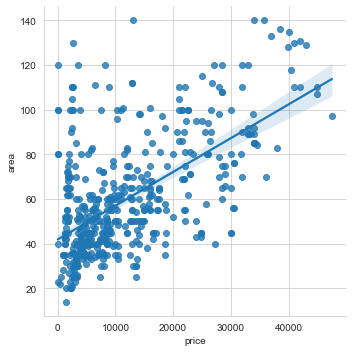

In [122]:
sns.lmplot(x='price', y='area',data=data)
plt.show()

Giữa giá nhà và tọa độ địa lý (lat, long) có tương quan với nhau 

#### 26. Giữa thuộc tính land_certificate và property_type có tương quan với nhau

Với mức ý nghĩa 0.05:<br>
- H0: Giữa thuộc tính land_certificate và property_type không có tương quan với nhau<br>
- H1: Giữa thuộc tính land_certificate và property_type có tương quan với nhau

In [123]:
data['Index'] = data.index

In [124]:
data_2 = data.pivot_table(values='Index', index='land_certificate', columns='property_type',aggfunc = 'count')
data_2

property_type,mat pho,trong ngo
land_certificate,,
So do,86,242
không có thông tin,71,141


In [125]:
data['land_certificate'].value_counts()

So do                 328
không có thông tin    212
Name: land_certificate, dtype: int64

In [126]:
from scipy.stats import chi2_contingency

In [127]:
chi, p, dof, expected = chi2_contingency(data_2)
#data là 1 list, chỉ lọc lấy định lượng tần suất
print('Chi-square value= ', chi)
print('pvalue= ', p)
print('degree of freedom= ', dof)
print('expected table= ', expected)

Chi-square value=  2.9582237356706007
pvalue=  0.08544175616231957
degree of freedom=  1
expected table=  [[ 95.36296296 232.63703704]
 [ 61.63703704 150.36296296]]


<AxesSubplot:xlabel='property_type', ylabel='land_certificate'>

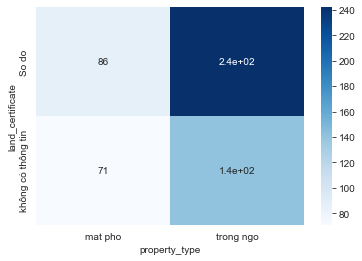

In [128]:
sns.heatmap(data_2, annot=True, cmap='Blues')

pvalue>0.05=> Chưa đủ điều kiện để bác bỏ H0, kết luận Giữa thuộc tính land_certificate và property_type không có tương quan với nhau<br>

#### 27. Hãy  mã hóa lại thuộc tính giá nhà theo đơn vị (nghìn đồng/m2) và sắp xếp giá nhà thành 4 mức tương ứng với các khoảng tứ phân vị. Tiến hành kiểm định tương quan giữa biến giá nhà này với các biến tọa độ vị trí (lat, long)

In [142]:
q1, q2, q3 = data['Gia/1m2'].quantile(0.25), data['Gia/1m2'].quantile(0.5), data['Gia/1m2'].quantile(0.75)
def price_m2_ordinal(price):
    if price<q1:
        return 1
    elif price>=q1 and price<q2:
        return 2
    elif price>=q2 and price<q3:
        return 3
    else:
        return 4
data['price_m2_ordinal'] = data['Gia/1m2'].apply(price_m2_ordinal)
data['price_m2_ordinal'].value_counts()

4    135
1    135
3    135
2    135
Name: price_m2_ordinal, dtype: int64

Với mức ý nghĩa 5%:<br>
    H0: Biến giá nhà và biến tọa độ vị trí lat không có tương quan<br>
    H1: Biến giá nhà và biến tọa độ vị trí lat có tương quan

In [144]:
r, pvalue = stats.spearmanr(data['price_m2_ordinal'],data['lat'])
print ("r: ", r, "; pvalue: ", pvalue)

r:  0.048269351128622566 ; pvalue:  0.2628280355125092


pvalue>0.05, chưa thể bác bỏ H0, biến giá nhà đã được phân mức thành các khoản không có tương quan với biến lat